## Comparing the length of decisions over time

I created version 1 quickly over 1 night, but it had several problems.

* The chart was not *really* over time. It compared the length across decisions.
* Code was fairly clunky as I created four series and combined into 1 graph.

Let's do this again.

In [6]:
# We set up the environment
# Zeeker database access and setup

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set()

%run ../set_up_zeekerDB.ipynb

### The following variables are now available:
* `db_client` -- access the MongoDB Atlas ZeekerDB (Read only) 
* `data_collection` -- collection of documents containing meta information of a decision 
* `corpus_collection` -- collection of documents containing the text of a decision

In [7]:
# Now let's construct our series for decision_length

# Holder for variables we will be using
decision_lengths = []
unique_ids = []
dates = []

decisions = data_collection.find({}, {'date': 1}).sort('date')

for decision in decisions:
    id = decision['_id']
    result = corpus_collection.find_one(id)
    decision_lengths.append(len(result['text']))
    unique_ids.append(id)
    dates.append(decision['date'])

data = {'unique_ids': unique_ids, 'dates': dates, 'decision_length': decision_lengths}

data_frame_length = pd.DataFrame.from_dict(data).groupby(pd.Grouper(key='dates',freq='M')).sum()

In [8]:
# Now let's construct our series for decision_count

data_frame_mean = pd.DataFrame.from_dict(data).groupby(pd.Grouper(key='dates',freq='M')).mean()
data_frame_count = pd.DataFrame.from_dict(data).groupby(pd.Grouper(key='dates',freq='M')).count()

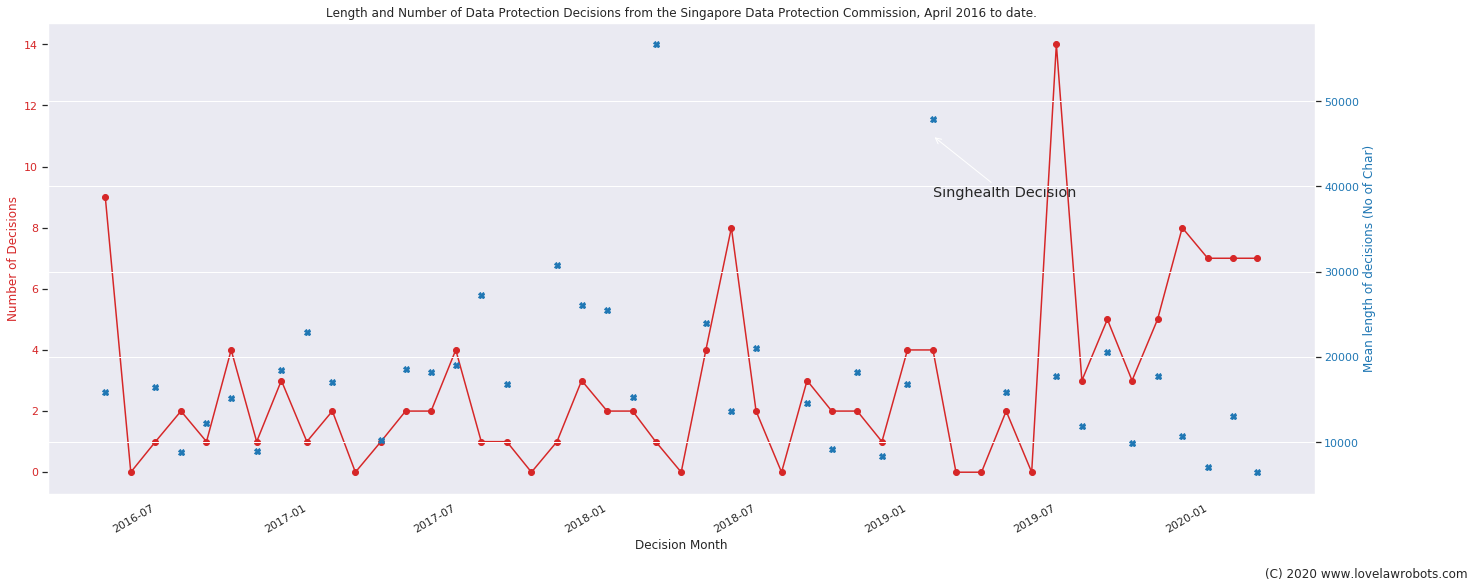

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Decision Month')
ax1.set_ylabel('Number of Decisions', color=color)
ax1.plot(data_frame_count.index.values, data_frame_count["decision_length"], "-o", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.annotate('Singhealth Decision', xy=("2019-01-31",11), xytext=("2019-01-31", 9),
             arrowprops=dict(arrowstyle='->'), fontsize='large')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Mean length of decisions (No of Char)', color=color)
ax2.plot(data_frame_mean.index.values, data_frame_mean["decision_length"], "X", color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.grid()

fig.autofmt_xdate()
fig.tight_layout()
fig.set_size_inches((25,10))

plt.figtext(0.8,0.13, "(C) 2020 www.lovelawrobots.com")
plt.title('Length and Number of Data Protection Decisions from the Singapore Data Protection Commission, April 2016 to date.');

# plt.savefig('./figure2.png')